In [1]:
#My inferences are that Capomulin and Ramicane kept lower Tumor Volume throughout the mice through all Timepoints. Infubinol and Ceftamin had higher Tumor volume for mice throughout all timeframes.  They also had a wider range of Volume levels leaving me to believe that these Regimens are less stable (consistant).
#Another inference is that Capomulin seems to take an effect on tumor volume around 25 seconds on average and decreases the volume of the tumor.
#My last observation is that while using Capomulin, mouse weight has a pretty good correlation (r = 0.84) with tumor size.  Therefore, this leads me to believe that weight (size of the mouse) affects the rapid growth of the tumor and tumor growth may have to do with ther amount of fat within the mouse.

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
singledata = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
singledata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mousenumber = singledata["Mouse ID"].value_counts()
mousenumber = len(mousenumber)
mousenumber

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = singledata.loc[singledata.duplicated( subset= ["Mouse ID","Timepoint"])]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#checking number of duplicates with Mouse ID g989
duplicateID = singledata.loc[singledata["Mouse ID"]=="g989"]
duplicateID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#mouse data without Mouse ID g989
cleandata= singledata.loc[singledata["Mouse ID"]!="g989"]
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Get all the data for the duplicate mouse ID...Timepoint's are different
duplicate_data = singledata[singledata.duplicated(["Mouse ID"])]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
nmiceclean = cleandata['Mouse ID'].value_counts()
len(nmiceclean)

248

In [8]:
#Clean data:  Tumor volume:  mean, median, variance, Std, SEM 

In [9]:
mean = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
median = singledata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
variance = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
std = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
sem = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Total number of measurements for each treatment regimen
summarytable = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': std, 'Standard Error of Measurement': sem })
summarytable

,Mean,Median,Variance,Standard Deviation,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.854632,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


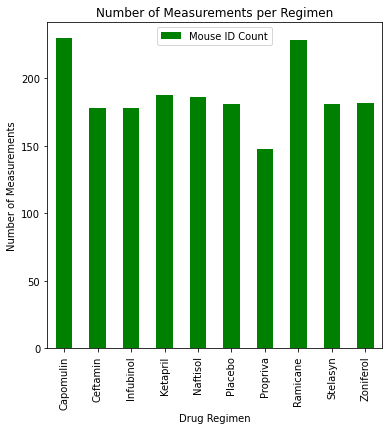

In [15]:
# bar plot using pandas
bar = cleandata.groupby(["Drug Regimen"]).count().reset_index()
twocat = bar[["Drug Regimen", "Mouse ID"]]
twocat= twocat.rename(columns = {"Mouse ID":"Mouse ID Count"})
twocat = twocat.set_index("Drug Regimen")
twocat.plot(kind ='bar', color = 'g', figsize = (6,6))
plt.title ('Number of Measurements per Regimen')
plt.ylabel('Number of Measurements')

plt.show()


In [16]:
#bar plot using pyplot as plt
numberdrug = cleandata.groupby("Drug Regimen")["Mouse ID"].count()
numberlist = numberdrug.tolist()
numberlist

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

In [17]:
#10 labels on x-axis
x_axis = np.arange(len(numberlist))

In [18]:
#10 drug names on x_axis
drugnames = summarytable.index.tolist()
drugnames

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

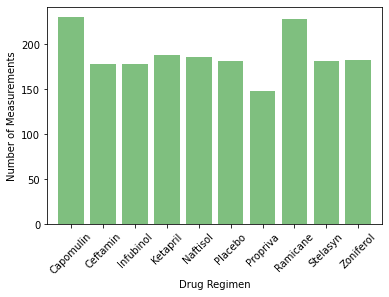

In [19]:
x_axis  = drugnames
plt.bar(x_axis, numberlist, color = 'g', align = 'center', alpha = 0.5)
plt.xlabel ('Drug Regimen')
plt.ylabel('Number of Measurements')

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, drugnames)
plt.xticks(rotation = 45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

In [20]:
#pie plot of male vs female pandas
cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
#Dataframe of Male to Female 
sexid =pd.DataFrame(cleandata.groupby(['Sex']).count()).reset_index()
sexid

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [22]:
#Have to reset index to filter to two columns
sexid2 = sexid[["Sex", "Mouse ID"]].rename(columns= {"Mouse ID":"Mouse ID count"})
sexid2

,Sex,Mouse ID count
0,Female,922
1,Male,958


Text(0.5, 1.0, 'Male vs Female Mouse Count')

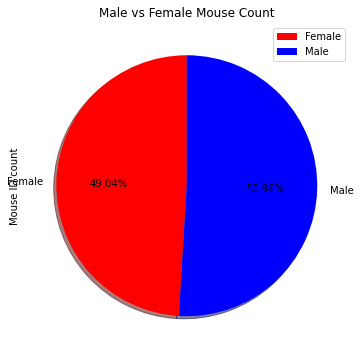

In [23]:
sexid2.plot(kind ='pie', y = "Mouse ID count", autopct='%1.2f%%', figsize = (6,6), startangle = 90, shadow= True, colors = ['red', 'blue'], labels = sexid2["Sex"])
plt.title('Male vs Female Mouse Count')

In [24]:
#pie plot of male vs female pyplot

In [25]:
labels = sexid2["Sex"]
sizes = sexid2["Mouse ID count"]
colors = ["red", "blue"]
explode = (0.1,0)

Text(0.5, 1.0, 'Male vs Female Mouse Count')

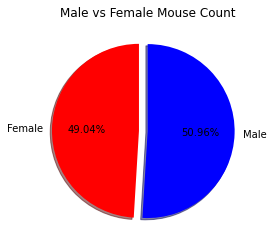

In [26]:
plt.pie(sizes, explode = explode, labels =labels, colors = colors, autopct ="%1.2f%%", shadow = True, startangle =90)
plt.title ('Male vs Female Mouse Count')

In [27]:
#Final tumor Volume for: Capomulin, Ramicane, Infubinol, and Ceftamin
#Calculate the quartiles and IQR

cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
#Creates list of 3 categories: Drug Regimen, Mouse ID, Timepoint
groups = cleandata.sort_values(["Drug Regimen", "Timepoint", "Mouse ID"], ascending =True).reset_index()
groups

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,300,b128,Capomulin,Female,9,22,0,45.000000,0
1,290,b742,Capomulin,Male,7,21,0,45.000000,0
2,60,f966,Capomulin,Male,16,17,0,45.000000,0
3,235,g288,Capomulin,Male,3,19,0,45.000000,0
4,351,g316,Capomulin,Female,22,22,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
1875,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1876,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1877,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1878,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [29]:
endmouse = groups.loc[groups["Timepoint"]==45]
endmouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
209,309,b128,Capomulin,Female,9,22,45,38.982878,2
210,299,b742,Capomulin,Male,7,21,45,38.939633,0
211,244,g288,Capomulin,Male,3,19,45,37.074024,1
212,360,g316,Capomulin,Female,22,22,45,40.159220,2
213,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
1875,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1876,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1877,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1878,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


[59.74190064,
 59.85195552,
 61.38666032,
 61.43389223,
 61.84902336,
 62.99935619,
 64.29983003,
 64.63494887,
 64.72983655,
 67.52748237,
 67.74866174,
 68.59474498,
 68.92318457]

 Capomulin Stat
The Lower Quartile is equal to 32.37735684
The Upper Quartile is equal to 40.1592203
The Interquartile Range is equal to 7.781863460000004
The Median is equal to 37.31184577
 Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
 No Outliers list: [23.34359787, 28.43096411, 28.48403281, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.125164399999996, 38.84687569, 38.93963263, 38.98287774, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 47.68596303]


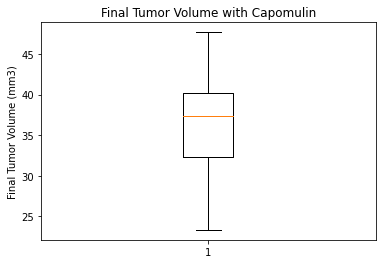

 Ramicane Stat
The Lower Quartile is equal to 30.981175224999998
The Upper Quartile is equal to 38.508305307499995
The Interquartile Range is equal to 7.527130082499998
The Median is equal to 34.848627300000004
 Lower Bound: 19.690480101250003
Upper Bound: 49.79900043124999
 No Outliers list: [22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.09533505, 31.56046955, 32.97852192, 33.39765251, 33.56240217, 36.13485243, 36.37451039, 37.22565033, 37.31123552, 38.407618299999996, 38.81036633, 40.65900627, 40.66771292, 43.04754260000001, 45.22086888]


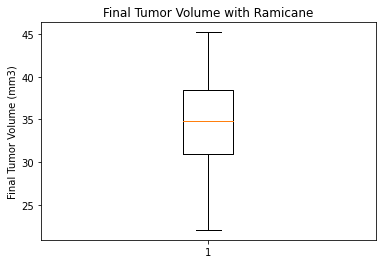

 Infubinol Stat
The Lower Quartile is equal to 62.75445141
The Upper Quartile is equal to 67.68556862
The Interquartile Range is equal to 4.9311172099999965
The Median is equal to 66.08306589
 Lower Bound: 55.35777559500001
Upper Bound: 75.08224443499999
 No Outliers list: [60.91876652, 62.43540402, 62.75445141, 65.52574285, 66.08306589, 66.19691151, 67.68556862, 67.97341878, 72.2267309]


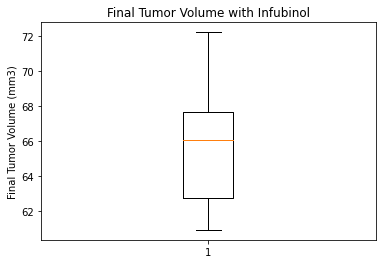

 Ceftamin Stat
The Lower Quartile is equal to 61.43389223
The Upper Quartile is equal to 67.52748237
The Interquartile Range is equal to 6.093590140000003
The Median is equal to 64.29983003
 Lower Bound: 52.29350701999999
Upper Bound: 76.66786758
 No Outliers list: [59.74190064, 59.85195552, 61.38666032, 61.43389223, 61.84902336, 62.99935619, 64.29983003, 64.63494887, 64.72983655, 67.52748237, 67.74866174, 68.59474498, 68.92318457]


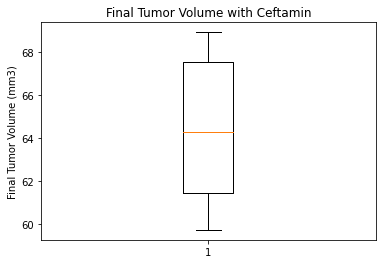

In [67]:
###Capomulin data to dataframe Capomulin, Ramicane, Infubinol, and Ceftamin
druglist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in druglist:
    specdrug = endmouse[endmouse["Drug Regimen"] == drug]
    specdrug



    #Capomulin data to dataframe from least to greatest .sortvalues
    capframe = specdrug.sort_values(['Tumor Volume (mm3)'], ascending = True)
    capframe = capframe["Tumor Volume (mm3)"]
    
    #Quartiles, Lower Quartile, Upper Quartile, IQR, lower bound, upper bound
    #use .quantile for quartile

    quartile = capframe.quantile([.25,.5,.75])
    lq = quartile[.25]
    uq = quartile[.75]
    iqr = uq-lq
    lowerb = lq - (1.5*iqr)
    upperb = uq + (1.5*iqr)
   

    print (f" {drug} Stat")
    print (f"The Lower Quartile is equal to {lq}")

    print (f"The Upper Quartile is equal to {uq}")

    print (f"The Interquartile Range is equal to {iqr}")

    print (f"The Median is equal to {capframe.median()}")
    
    print (f' Lower Bound: {lowerb}')
    print (f'Upper Bound: {upperb}')
    outliers =  list(capframe)
    print(f' No Outliers list: {outliers}')
    
    #box and whisker plot for data

    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Final Tumor Volume with {drug}')
    ax1.set_ylabel('Final Tumor Volume (mm3)')
    ax1.boxplot(capframe)
    plt.show()


In [68]:
# Compare One mouse using Capomulin... line plot of tumor vol vs time point
capomulin = cleandata.loc[cleandata["Drug Regimen"]=="Capomulin"]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [69]:
capmouse= capomulin[capomulin["Mouse ID"]== 'b128']
capmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [70]:
capmouse2 = capmouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capmouse2

,Timepoint,Tumor Volume (mm3)
300,0,45.000000
301,5,45.651331
302,10,43.270852
303,15,43.784893
304,20,42.731552
305,25,43.262145
306,30,40.605335
307,35,37.967644
308,40,38.379726
309,45,38.982878


In [71]:
x_axis = capmouse2['Timepoint']
y_axis = capmouse2['Tumor Volume (mm3)']

Text(0.5, 1.0, 'Mouse ID b128: Timepoint vs Tumor Volume')

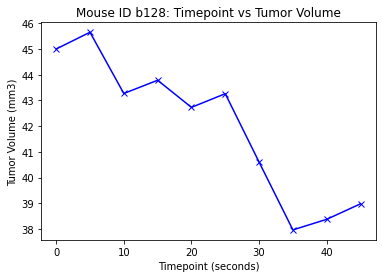

In [72]:
comparechart, = plt.plot(x_axis, y_axis, marker = 'x', color = 'blue')
plt.xlabel('Timepoint (seconds)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse ID b128: Timepoint vs Tumor Volume')

In [73]:
#scatterplot of mice weight vs avg tumor vol
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [74]:
scattercap = capomulin.loc[:, ["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
scattercap

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [75]:
meancap = pd.DataFrame(scattercap.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
meancap = meancap.rename (columns = {"Tumor Volume (mm3)" : "Average Tumor Volume (mm3)"})
meancap

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [76]:
weight = meancap["Weight (g)"]
avgtumor = meancap["Average Tumor Volume (mm3)"]

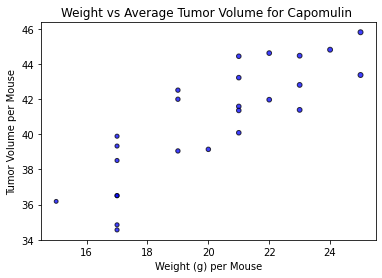

In [77]:
plt.scatter(weight, avgtumor, marker="o", facecolors="blue", edgecolors="black",
            s=weight, alpha=0.75)
plt.title ("Weight vs Average Tumor Volume for Capomulin ")
plt.xlabel("Weight (g) per Mouse")
plt.ylabel("Tumor Volume per Mouse")
plt.show()

In [78]:
#corr coef & lin regress model of mouse weight and avg tumor vol
#meancap is tumor vol average per mouse with Capomulin

weight

0     22
1     21
2     17
3     19
4     22
5     24
6     20
7     23
8     21
9     21
10    19
11    17
12    19
13    25
14    17
15    25
16    17
17    23
18    17
19    17
20    21
21    23
22    21
23    15
24    17
Name: Weight (g), dtype: int64

In [79]:
avgtumor

0     41.963636
1     40.083699
2     36.505973
3     41.990097
4     44.613344
5     44.805810
6     39.141053
7     44.465236
8     43.216925
9     44.434474
10    42.507261
11    34.847470
12    39.049816
13    45.798970
14    36.509212
15    43.367364
16    34.559143
17    42.803733
18    39.328725
19    39.887495
20    41.581595
21    41.384825
22    41.352452
23    36.182040
24    38.506829
Name: Average Tumor Volume (mm3), dtype: float64

In [80]:
#correlation and linear regression equation and line
corr = st.pearsonr(weight, avgtumor)
corr

(0.8419363424694717, 1.322572243471279e-07)

In [81]:
print (f'The correlation between weight and average tumor for each mouse is {round(corr[0],2)}')

The correlation between weight and average tumor for each mouse is 0.84


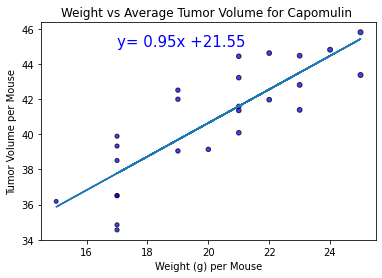

In [82]:
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(weight, avgtumor)

bestfittumor = slope * weight + intercept

plt.scatter(weight, avgtumor, marker="o", facecolors="blue", edgecolors="black",
         s=weight, alpha=0.75)
lineeq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(weight, bestfittumor)
plt.annotate(lineeq, (17,45), fontsize =15, color = 'blue')
plt.title ("Weight vs Average Tumor Volume for Capomulin ")
plt.xlabel("Weight (g) per Mouse")
plt.ylabel("Tumor Volume per Mouse")

plt.show()